Nama: Victor<br>
Umur: 20 tahun<br>
Email: angvictor91@gmail.com

In [1]:
import tensorflow as tf
import zipfile,os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-09 11:26:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.40MB/s    in 48s     

2021-04-09 11:27:18 (6.40 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
image_generator = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [5]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_dataset = image_generator.flow_from_directory(base_dir,
                                                 batch_size=32,
                                                 target_size=(225, 225), 
                                                 color_mode='rgb',
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = image_generator.flow_from_directory(base_dir,
                                                 batch_size=32,
                                                 color_mode='rgb',
                                                 target_size=(225, 225), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(225, 225, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
      train_dataset,
      steps_per_epoch=25,
      epochs=20,
      validation_data=val_dataset,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 92s - loss: 1.0600 - accuracy: 0.4600 - val_loss: 0.8593 - val_accuracy: 0.6500
Epoch 2/20
25/25 - 85s - loss: 0.7415 - accuracy: 0.7237 - val_loss: 0.5280 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 85s - loss: 0.3591 - accuracy: 0.8763 - val_loss: 0.2941 - val_accuracy: 0.9187
Epoch 4/20
25/25 - 82s - loss: 0.2443 - accuracy: 0.9286 - val_loss: 0.2736 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 82s - loss: 0.3094 - accuracy: 0.8935 - val_loss: 0.2480 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 81s - loss: 0.2429 - accuracy: 0.9182 - val_loss: 0.2692 - val_accuracy: 0.9187
Epoch 7/20
25/25 - 85s - loss: 0.2250 - accuracy: 0.9250 - val_loss: 0.2005 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 82s - loss: 0.1486 - accuracy: 0.9494 - val_loss: 0.1280 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 83s - loss: 0.1397 - accuracy: 0.9558 - val_loss: 0.1537 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 82s - loss: 0.1191 - accuracy: 0.9468 - val_loss: 0.1711 - val_accuracy: 0.9438
Epoch 11/

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
scissors


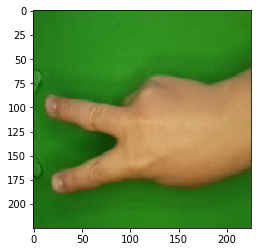

In [10]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
pred_keys = train_dataset.class_indices

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(225,225))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  result = np.argmax(classes)
  for key, value in pred_keys.items():
    if value == result:
      print(key)